Intervals: [(4.0, 5.6), (5.6, 7.199999999999999), (7.199999999999999, 8.799999999999999), (8.799999999999999, 10.399999999999999), (10.399999999999999, 11.999999999999998), (11.999999999999998, 12.0)]


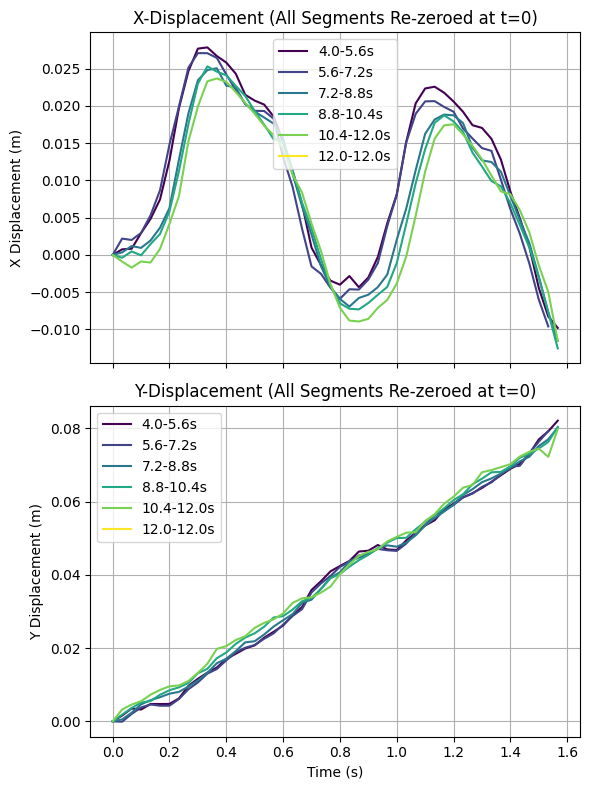

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --------------------
# User-configurable parameters
# --------------------
file_path = '/Users/jamesxu/Desktop/Crab Lab/surface swimmer/diffLength_data/40cm_new-James-2024-10-01/videos/40cm_run4DLC_resnet50_40cm_newOct1shuffle1_100000.csv'
bodypart_name = 'bodypart1'  # e.g. 'bodypart13'
fps = 30  # frames per second

# We want to break [4 s, 12 s] into intervals of 1.6 s each:
start_time_s = 4.0
end_time_s = 12.0
interval_length_s = 1.6

# Real-world frame size (in meters)
real_width_m = 0.645
real_height_m = 1.4

# Video frame size (in pixels)
frame_width_pixels = 886
frame_height_pixels = 1920

# --------------------
# Load data (only once)
# --------------------
data = pd.read_csv(file_path, header=[1, 2])
x_pixels_full = data[(bodypart_name, 'x')]
y_pixels_full = data[(bodypart_name, 'y')]

# --------------------
# Convert full data to meters
# --------------------
scale_x = real_width_m / frame_width_pixels   # meters per pixel (width)
scale_y = real_height_m / frame_height_pixels # meters per pixel (height)

x_m_full = x_pixels_full * scale_x
y_m_full = y_pixels_full * scale_y

# --------------------
# Build intervals in a loop to avoid rounding issues
# --------------------
intervals = []
current_start = start_time_s

while current_start < end_time_s:
    current_end = current_start + interval_length_s
    if current_end > end_time_s:
        current_end = end_time_s
    intervals.append((current_start, current_end))
    current_start = current_end

print("Intervals:", intervals)
# Expect: [(4.0, 5.6), (5.6, 7.2), (7.2, 8.8), (8.8, 10.4), (10.4, 12.0)]

# Prepare distinct colors for each interval
colors = plt.cm.viridis(np.linspace(0, 1, len(intervals)))

# --------------------
# Plot X & Y displacement on one figure
#   - Each interval re-zeroed at t = 0
#   - Show all intervals on the same axes
# --------------------
fig, (ax_xdisp, ax_ydisp) = plt.subplots(nrows=2, ncols=1, figsize=(6, 8), sharex=True)

for i, (t_start, t_end) in enumerate(intervals):
    start_frame = int(t_start * fps)
    end_frame   = int(t_end   * fps)
    
    # Extract data for this interval
    x_m_segment = x_m_full[start_frame:end_frame]
    y_m_segment = y_m_full[start_frame:end_frame]
    
    # If empty, skip
    if len(x_m_segment) == 0:
        continue
    
    # Displacements relative to the first frame of this segment
    x0 = x_m_segment.iloc[0]
    y0 = y_m_segment.iloc[0]
    x_displacement = x_m_segment - x0
    y_displacement = y_m_segment - y0
    
    # Build time axis from 0 to (interval_length_s) for each segment
    num_frames = len(x_m_segment)
    time_axis = np.arange(num_frames) / fps  # <--- starts at 0

    # Label shows the real time window, but data is plotted from 0 upward
    label_str = f"{t_start:.1f}-{t_end:.1f}s"
    
    # Plot X displacement
    ax_xdisp.plot(
        time_axis,
        x_displacement,
        linestyle='-',
        color=colors[i],
        label=label_str
    )
    
    # Plot Y displacement
    ax_ydisp.plot(
        time_axis,
        y_displacement,
        linestyle='-',
        color=colors[i],
        label=label_str
    )

ax_xdisp.set_title("X-Displacement (All Segments Re-zeroed at t=0)")
ax_xdisp.set_ylabel("X Displacement (m)")
ax_xdisp.grid(True)
ax_xdisp.legend()

ax_ydisp.set_title("Y-Displacement (All Segments Re-zeroed at t=0)")
ax_ydisp.set_xlabel("Time (s)")
ax_ydisp.set_ylabel("Y Displacement (m)")
ax_ydisp.grid(True)
ax_ydisp.legend()

plt.tight_layout()
plt.show()


Intervals: [(4.0, 5.6), (5.6, 7.199999999999999), (7.199999999999999, 8.799999999999999), (8.799999999999999, 10.399999999999999), (10.399999999999999, 11.999999999999998), (11.999999999999998, 12.0)]


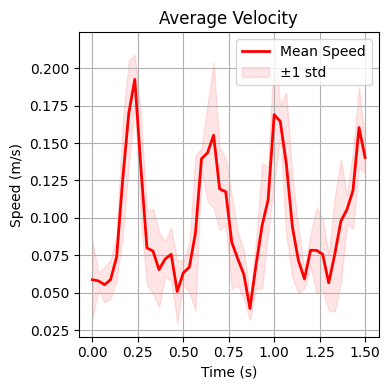

Overall mean velocity = 0.097 m/s


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --------------------
# 1) User-configurable
# --------------------
file_path = '/Users/jamesxu/Desktop/Crab Lab/surface swimmer/diffLength_data/40cm_new-James-2024-10-01/videos/40cm_run4DLC_resnet50_40cm_newOct1shuffle1_100000.csv'
bodypart_name = 'bodypart1'
fps = 30  # frames/s

# We'll use time intervals of 1.6 s each, from [4..12] => (4->5.6, 5.6->7.2, etc.)
start_time_s = 4.0
end_time_s   = 12.0
interval_length_s = 1.6

# Real-world dimensions and frame size
real_width_m  = 0.645
real_height_m = 1.4
frame_width_pixels  = 886
frame_height_pixels = 1920

# --------------------
# 2) Load data & convert to meters
# --------------------
data = pd.read_csv(file_path, header=[1, 2])
x_pixels = data[(bodypart_name, 'x')]
y_pixels = data[(bodypart_name, 'y')]

scale_x = real_width_m / frame_width_pixels   # m/pixel
scale_y = real_height_m / frame_height_pixels # m/pixel

x_m_full = x_pixels * scale_x
y_m_full = y_pixels * scale_y

# --------------------
# 3) Build intervals [4..5.6, 5.6..7.2, etc.]
# --------------------
intervals = []
current_start = start_time_s
while current_start < end_time_s:
    current_end = current_start + interval_length_s
    if current_end > end_time_s:
        current_end = end_time_s
    intervals.append((current_start, current_end))
    current_start = current_end

print("Intervals:", intervals)
# Expect: [(4.0, 5.6), (5.6, 7.2), (7.2, 8.8), (8.8, 10.4), (10.4, 12.0)]

# --------------------
# 4) For each interval, compute speed array
#    (Time re-zeroed => 0..1.6 s)
# --------------------
all_speed_arrays = []
dt = 1.0 / fps

for (t_start, t_end) in intervals:
    start_frame = int(t_start * fps)
    end_frame   = int(t_end   * fps)
    
    # Extract x(t), y(t) for this interval
    x_seg = x_m_full[start_frame:end_frame].values
    y_seg = y_m_full[start_frame:end_frame].values
    
    # Skip if not enough frames
    if len(x_seg) < 2:
        continue
    
    # Discrete differences
    dx = np.diff(x_seg)
    dy = np.diff(y_seg)
    speed = np.sqrt(dx**2 + dy**2) / dt  # length = N-1 if x_seg has length N
    
    all_speed_arrays.append(speed)

# --------------------
# 5) Trim all speed arrays to the same length, then compute mean & std
# --------------------
# e.g., each 1.6 s chunk at 30 fps should have ~48 frames => speed array of size 47
min_len = min(len(s) for s in all_speed_arrays)
for i in range(len(all_speed_arrays)):
    all_speed_arrays[i] = all_speed_arrays[i][:min_len]

speed_2d = np.vstack(all_speed_arrays)     # shape: (num_intervals, min_len)
mean_speed = np.mean(speed_2d, axis=0)     # shape: (min_len,)
std_speed  = np.std(speed_2d, axis=0)

# Build time axis from 0..(min_len-1)*dt
time_axis = np.arange(min_len) * dt  # each index = i*dt

# --------------------
# 6) Plot average speed (+ error band)
# --------------------
plt.figure(figsize=(4, 4))
plt.plot(time_axis, mean_speed, color='red', label='Mean Speed', linewidth=2)
plt.fill_between(
    time_axis,
    mean_speed - std_speed,
    mean_speed + std_speed,
    color='red', alpha=0.1,
    label='±1 std'
)
plt.title("Average Velocity")
plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --------------------
# 7) Print the overall mean velocity
#    (i.e., mean of the mean speed array)
# --------------------
overall_mean_speed = np.mean(mean_speed)
print(f"Overall mean velocity = {overall_mean_speed:.3f} m/s")


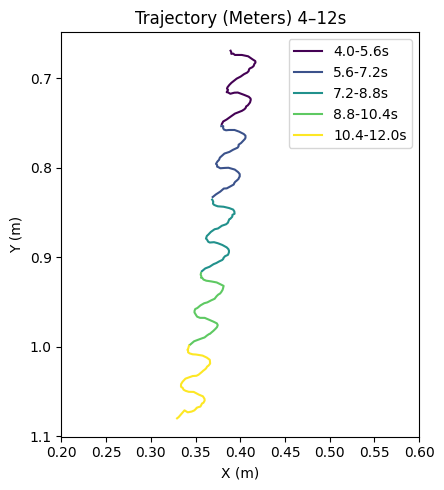

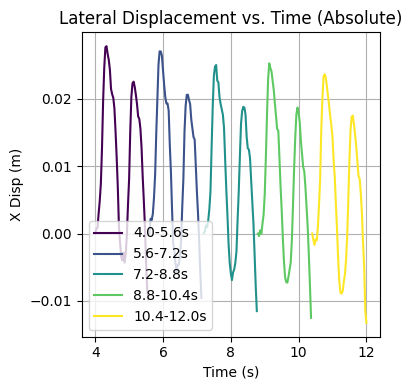

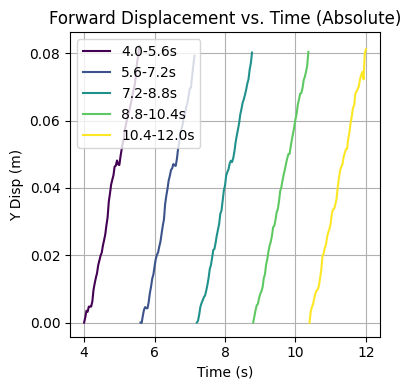

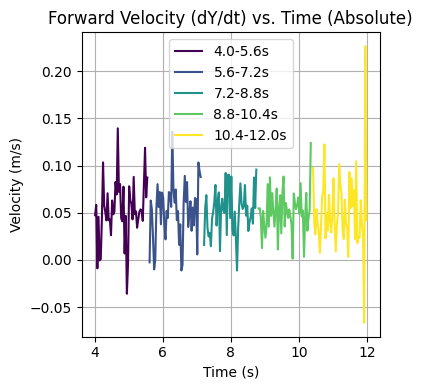

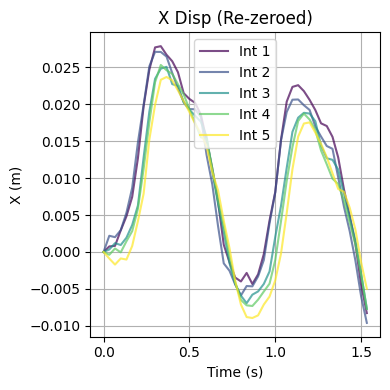

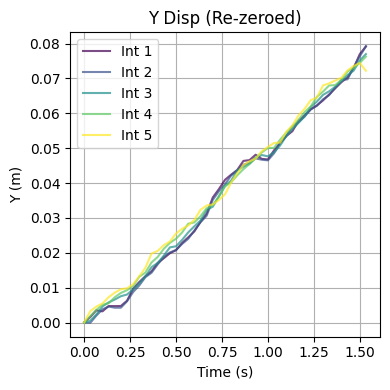

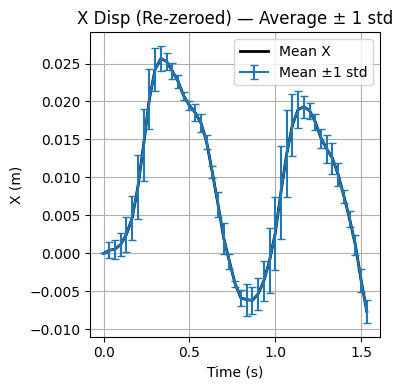

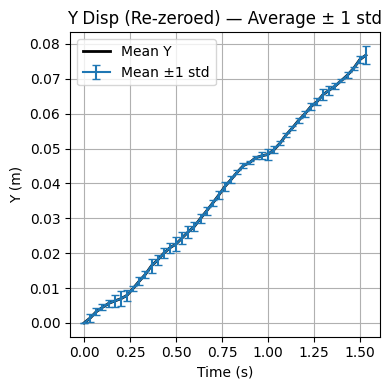

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
# 1) USER CONFIG
# =============================================================================
file_path = '/Users/jamesxu/Desktop/Crab Lab/surface swimmer/diffLength_data/40cm_new-James-2024-10-01/videos/40cm_run4DLC_resnet50_40cm_newOct1shuffle1_100000.csv'
bodypart_name = 'bodypart1'
fps = 30  # frames/s

# Interval boundaries: [4.0, 5.6, 7.2, 8.8, 10.4]
interval_starts = np.arange(4.0, 12.0, 1.6)
interval_ends   = interval_starts + 1.6
interval_ends[-1] = 12.0  # clamp the last to 12.0

# Real-world dimensions
real_width_m  = 0.645
real_height_m = 1.4

# Pixel resolution
frame_width_pixels  = 886
frame_height_pixels = 1920

# =============================================================================
# 2) LOAD DATA & CONVERT PIXELS TO METERS
# =============================================================================
data = pd.read_csv(file_path, header=[1, 2])
x_pixels = data[(bodypart_name, 'x')]
y_pixels = data[(bodypart_name, 'y')]

scale_x = real_width_m / frame_width_pixels
scale_y = real_height_m / frame_height_pixels

x_m_full = x_pixels * scale_x
y_m_full = y_pixels * scale_y

# =============================================================================
# 3) HELPER: EXTRACT A SLICE [start_s, end_s] AND RETURN ARRAYS
#    Also compute absolute time axis for that slice
# =============================================================================
def slice_interval(t_start, t_end, xdata, ydata):
    start_f = int(t_start * fps)
    end_f   = int(t_end   * fps)
    x_arr = xdata[start_f:end_f].values
    y_arr = ydata[start_f:end_f].values
    
    # Build absolute time from t_start..t_end
    frames = len(x_arr)
    t_arr = np.arange(frames) / fps + t_start
    
    return x_arr, y_arr, t_arr

# =============================================================================
# 4) FIGURE 1: TRAJECTORY (ABSOLUTE)
# =============================================================================
plt.figure(figsize=(5, 5))
colors = plt.cm.viridis(np.linspace(0, 1, len(interval_starts)))

for i, (ts, te) in enumerate(zip(interval_starts, interval_ends)):
    x_slice, y_slice, _ = slice_interval(ts, te, x_m_full, y_m_full)
    label_str = f"{ts:.1f}-{te:.1f}s"
    plt.plot(x_slice, y_slice, color=colors[i], label=label_str)

plt.title("Trajectory (Meters) 4–12s")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.gca().set_aspect('equal', 'box')
plt.gca().invert_yaxis()
plt.xlim(0.2, 0.6)  # optional
plt.legend()
plt.tight_layout()
plt.show()

# =============================================================================
# 5) FIGURE 2: LATERAL DISPLACEMENT (X) vs. TIME (ABSOLUTE)
# =============================================================================
plt.figure(figsize=(4, 4))
for i, (ts, te) in enumerate(zip(interval_starts, interval_ends)):
    x_slice, _, t_slice = slice_interval(ts, te, x_m_full, y_m_full)
    if len(x_slice) == 0:
        continue
    # Displacement relative to the first frame of the slice
    x0 = x_slice[0]
    x_disp = x_slice - x0
    plt.plot(t_slice, x_disp, color=colors[i], label=f"{ts:.1f}-{te:.1f}s")

plt.title("Lateral Displacement vs. Time (Absolute)")
plt.xlabel("Time (s)")
plt.ylabel("X Disp (m)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# =============================================================================
# 6) FIGURE 3: FORWARD DISPLACEMENT (Y) vs. TIME (ABSOLUTE)
# =============================================================================
plt.figure(figsize=(4, 4))
for i, (ts, te) in enumerate(zip(interval_starts, interval_ends)):
    _, y_slice, t_slice = slice_interval(ts, te, x_m_full, y_m_full)
    if len(y_slice) == 0:
        continue
    y0 = y_slice[0]
    y_disp = y_slice - y0
    plt.plot(t_slice, y_disp, color=colors[i], label=f"{ts:.1f}-{te:.1f}s")

plt.title("Forward Displacement vs. Time (Absolute)")
plt.xlabel("Time (s)")
plt.ylabel("Y Disp (m)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# =============================================================================
# 7) FIGURE 4: FORWARD VELOCITY (dY/dt) vs. TIME (ABSOLUTE)
# =============================================================================
plt.figure(figsize=(4, 4))
dt = 1/fps
for i, (ts, te) in enumerate(zip(interval_starts, interval_ends)):
    _, y_slice, t_slice = slice_interval(ts, te, x_m_full, y_m_full)
    if len(y_slice) < 2:
        continue
    # discrete derivative
    dy = np.diff(y_slice)
    vel = dy / dt
    # time axis for velocity => one less point
    t_vel = t_slice[:-1] + dt/2.0  # shift half-frame if you like
    plt.plot(t_vel, vel, color=colors[i], label=f"{ts:.1f}-{te:.1f}s")

plt.title("Forward Velocity (dY/dt) vs. Time (Absolute)")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# =============================================================================
# 8) BUILD RE-ZEROED ARRAYS (X_disp, Y_disp) FOR [0..1.6]S
#    => We'll also keep them for the final average ± band
# =============================================================================
x_disp_list = []
y_disp_list = []
for ts, te in zip(interval_starts, interval_ends):
    x_slice, y_slice, _ = slice_interval(ts, te, x_m_full, y_m_full)
    if len(x_slice) == 0:
        continue
    # Re-zero
    x0, y0 = x_slice[0], y_slice[0]
    x_disp = x_slice - x0
    y_disp = y_slice - y0
    x_disp_list.append(x_disp)
    y_disp_list.append(y_disp)

# Enforce same length
min_len = min(len(arr) for arr in x_disp_list)
for i in range(len(x_disp_list)):
    x_disp_list[i] = x_disp_list[i][:min_len]
    y_disp_list[i] = y_disp_list[i][:min_len]

X_disp_2d = np.vstack(x_disp_list)  # shape (5, min_len)
Y_disp_2d = np.vstack(y_disp_list)  # shape (5, min_len)

t_zeroed = np.arange(min_len) / fps  # 0..1.6 s (minus 1 frame)

# =============================================================================
# 9) FIGURE 5: X DISP (ZEROED) => Show all 5 intervals
# =============================================================================
plt.figure(figsize=(4, 4))
for i, x_arr in enumerate(X_disp_2d):
    plt.plot(t_zeroed, x_arr, color=colors[i], alpha=0.7, label=f"Int {i+1}")
plt.title("X Disp (Re-zeroed)")
plt.xlabel("Time (s)")
plt.ylabel("X (m)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# =============================================================================
# 10) FIGURE 6: Y DISP (ZEROED) => Show all 5 intervals
# =============================================================================
plt.figure(figsize=(4, 4))
for i, y_arr in enumerate(Y_disp_2d):
    plt.plot(t_zeroed, y_arr, color=colors[i], alpha=0.7, label=f"Int {i+1}")
plt.title("Y Disp (Re-zeroed)")
plt.xlabel("Time (s)")
plt.ylabel("Y (m)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# =============================================================================
# 11) FIGURE 7: X DISP (ZEROED) AVERAGE ± ERROR BAND
#      - Only the mean + band, no individual lines
# =============================================================================
mean_x = np.mean(X_disp_2d, axis=0)
std_x  = np.std(X_disp_2d, axis=0)

plt.figure(figsize=(4, 4))
plt.plot(t_zeroed, mean_x, color='k', linewidth=2, label="Mean X")
plt.errorbar(
    time_axis, mean_x,
    yerr=std_x,
    capsize=3,               # length of the caps
    elinewidth=1.5,          # thickness of the error bar lines
    label='Mean ±1 std'
)
plt.title("X Disp (Re-zeroed) — Average ± 1 std")
plt.xlabel("Time (s)")
plt.ylabel("X (m)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# =============================================================================
# 12) FIGURE 8: Y DISP (ZEROED) AVERAGE ± ERROR BAND
#      - Only the mean + band, no individual lines
# =============================================================================
mean_y = np.mean(Y_disp_2d, axis=0)
std_y  = np.std(Y_disp_2d, axis=0)

plt.figure(figsize=(4, 4))
plt.plot(t_zeroed, mean_y, color='k', linewidth=2, label="Mean Y")
plt.errorbar(
    time_axis, mean_y,
    yerr=std_y,
    capsize=3,               # length of the caps
    elinewidth=1.5,          # thickness of the error bar lines
    label='Mean ±1 std'
)
plt.title("Y Disp (Re-zeroed) — Average ± 1 std")
plt.xlabel("Time (s)")
plt.ylabel("Y (m)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


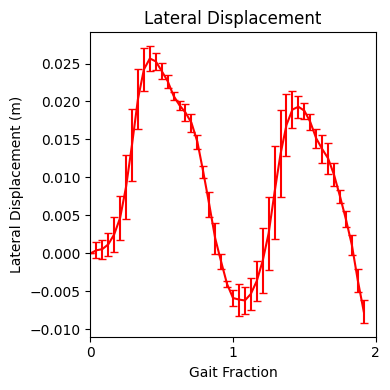

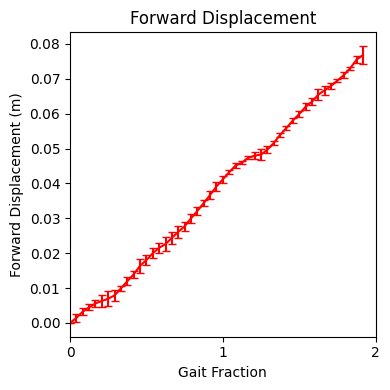

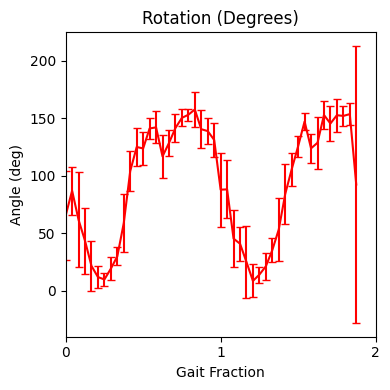

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------
# 1) USER CONFIG
# ---------------------------------------------------------------------
file_path = '/Users/jamesxu/Desktop/Crab Lab/surface swimmer/diffLength_data/40cm_new-James-2024-10-01/videos/40cm_run4DLC_resnet50_40cm_newOct1shuffle1_100000.csv'
bodypart_name = 'bodypart1'
fps = 30  # frames/s

# Intervals: [4..5.6, 5.6..7.2, 7.2..8.8, 8.8..10.4, 10.4..12.0]
interval_starts = np.arange(4.0, 12.0, 1.6)  # => [4.0, 5.6, 7.2, 8.8, 10.4]
interval_ends   = interval_starts + 1.6
interval_ends[-1] = 12.0  # clamp last to 12.0

# Real-world dimensions
real_width_m  = 0.645
real_height_m = 1.4

# Pixel resolution
frame_width_pixels  = 886
frame_height_pixels = 1920

# ---------------------------------------------------------------------
# 2) LOAD DATA & CONVERT PIXELS -> METERS
# ---------------------------------------------------------------------
data = pd.read_csv(file_path, header=[1, 2])
x_pixels = data[(bodypart_name, 'x')]
y_pixels = data[(bodypart_name, 'y')]

scale_x = real_width_m / frame_width_pixels   # m/pixel
scale_y = real_height_m / frame_height_pixels # m/pixel

x_m_full = x_pixels * scale_x
y_m_full = y_pixels * scale_y

# ---------------------------------------------------------------------
# 3) HELPER: SLICE INTERVAL => x_arr, y_arr, frames
# ---------------------------------------------------------------------
def slice_interval(t_start, t_end, xdata, ydata):
    start_f = int(t_start * fps)
    end_f   = int(t_end   * fps)
    x_arr = xdata[start_f:end_f].values
    y_arr = ydata[start_f:end_f].values
    return x_arr, y_arr

# ---------------------------------------------------------------------
# 4) COLLECT X, Y, & ROTATION FOR EACH INTERVAL (RE-ZEROED)
# ---------------------------------------------------------------------
x_disp_list = []
y_disp_list = []
rot_list    = []  # rotation in degrees

for t_s, t_e in zip(interval_starts, interval_ends):
    x_seg, y_seg = slice_interval(t_s, t_e, x_m_full, y_m_full)
    if len(x_seg) < 2:
        continue
    
    # Re-zero X, Y
    x0, y0 = x_seg[0], y_seg[0]
    x_disp = x_seg - x0
    y_disp = y_seg - y0
    
    x_disp_list.append(x_disp)
    y_disp_list.append(y_disp)
    
    # ROTATION: discrete heading from (dx, dy)
    dx = np.diff(x_disp)
    dy = np.diff(y_disp)
    heading_deg = np.degrees(np.arctan2(dy, dx))  # length = N-1
    rot_list.append(heading_deg)

# ---------------------------------------------------------------------
# 5) ENSURE ALL INTERVALS HAVE SAME LENGTH -> TRIM
#    (X, Y => same length; rotation => one less sample)
# ---------------------------------------------------------------------
min_len_xy = min(len(arr) for arr in x_disp_list)  # e.g., 48
min_len_rot = min(len(arr) for arr in rot_list)     # e.g., 47

# Trim
for i in range(len(x_disp_list)):
    x_disp_list[i] = x_disp_list[i][:min_len_xy]
    y_disp_list[i] = y_disp_list[i][:min_len_xy]

for i in range(len(rot_list)):
    rot_list[i] = rot_list[i][:min_len_rot]

# Stack
X_disp_2d = np.vstack(x_disp_list)  # shape: (Nintervals, min_len_xy)
Y_disp_2d = np.vstack(y_disp_list)
Rot_2d    = np.vstack(rot_list)     # shape: (Nintervals, min_len_rot)

# ---------------------------------------------------------------------
# 6) BUILD GAIT FRACTIONS
#    - X/Y displacement arrays: size = min_len_xy
#      => time goes 0..(min_len_xy-1)/fps
#    - Rotation arrays: size = min_len_rot
#      => time goes 0..(min_len_rot-1)/fps
#    - 1 cycle = 0.8s => gait fraction = time / 0.8
# ---------------------------------------------------------------------
time_xy = np.arange(min_len_xy) / fps
gait_xy = time_xy / 0.8  # range ~ 0..2 if min_len_xy ~ 48

time_rot = np.arange(min_len_rot) / fps
gait_rot = time_rot / 0.8

# ---------------------------------------------------------------------
# 7) COMPUTE MEAN & STD
# ---------------------------------------------------------------------
mean_x = np.mean(X_disp_2d, axis=0)
std_x  = np.std(X_disp_2d, axis=0)

mean_y = np.mean(Y_disp_2d, axis=0)
std_y  = np.std(Y_disp_2d, axis=0)

mean_rot = np.mean(Rot_2d, axis=0)
std_rot  = np.std(Rot_2d, axis=0)

# ---------------------------------------------------------------------
# 8) FIGURE A: X Displacement (avg ± error bar) vs. gait fraction
# ---------------------------------------------------------------------
plt.figure(figsize=(4,4))
plt.errorbar(
    gait_xy, mean_x,
    yerr=std_x,       # line+circle markers
    color='red',
    capsize=3,
    label='Mean ±1 std'
)
plt.title("Lateral Displacement")
plt.xlabel("Gait Fraction")
plt.ylabel("Lateral Displacement (m)")

# Turn OFF the grid:
plt.grid(False)

# Only ticks at [0,1,2]:
plt.xticks([0,1,2])
plt.xlim(0,2)

plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# 9) FIGURE B: Y Displacement (avg ± error bar) vs. gait fraction
# ---------------------------------------------------------------------
plt.figure(figsize=(4,4))
plt.errorbar(
    gait_xy, mean_y,
    yerr=std_y,
    color='red',
    capsize=3,
)
plt.title("Forward Displacement")
plt.xlabel("Gait Fraction")
plt.ylabel("Forward Displacement (m)")
plt.grid(False)
plt.xticks([0,1,2])
plt.xlim(0,2)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# 10) FIGURE C: Rotation (avg ± error bar) vs. gait fraction
# ---------------------------------------------------------------------
plt.figure(figsize=(4,4))
plt.errorbar(
    gait_rot, mean_rot,
    yerr=std_rot,     
    color='red',
    capsize=3,
)
plt.title("Rotation (Degrees)")
plt.xlabel("Gait Fraction")
plt.ylabel("Angle (deg)")
plt.grid(False)
plt.xticks([0,1,2])
plt.xlim(0,2)
plt.tight_layout()
plt.show()


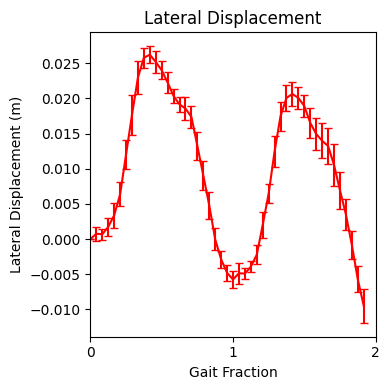

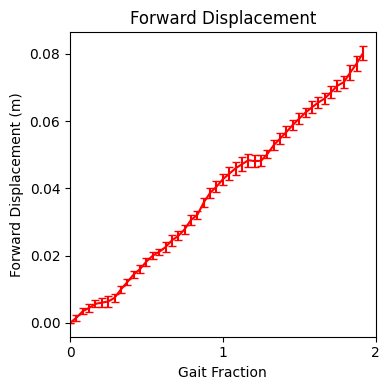

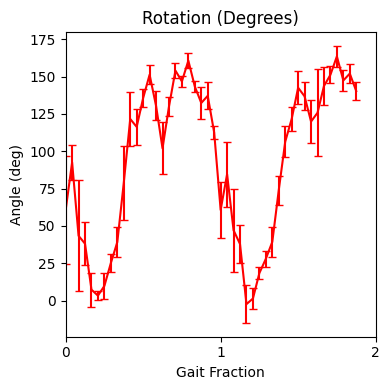

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------
# 1) USER CONFIG
# ---------------------------------------------------------------------
file_path = '/Users/jamesxu/Desktop/Crab Lab/surface swimmer/diffLength_data/40cm_new-James-2024-10-01/videos/40cm_run4DLC_resnet50_40cm_newOct1shuffle1_100000.csv'
bodypart_name = 'bodypart1'
fps = 30  # frames/s

# Intervals: [2.4..4.0, 4.0..5.6, 5.6..7.2, 7.2..8.8, 8.8..10.4]
interval_starts = np.arange(2.4, 10.4, 1.6)
interval_ends   = interval_starts + 1.6
interval_ends[-1] = 10.4  # clamp last to 10.4

# Real-world dimensions
real_width_m  = 0.645
real_height_m = 1.4

# Pixel resolution
frame_width_pixels  = 886
frame_height_pixels = 1920

# ---------------------------------------------------------------------
# 2) LOAD DATA & CONVERT PIXELS -> METERS
# ---------------------------------------------------------------------
data = pd.read_csv(file_path, header=[1, 2])
x_pixels = data[(bodypart_name, 'x')]
y_pixels = data[(bodypart_name, 'y')]

scale_x = real_width_m / frame_width_pixels   # m/pixel
scale_y = real_height_m / frame_height_pixels # m/pixel

x_m_full = x_pixels * scale_x
y_m_full = y_pixels * scale_y

# ---------------------------------------------------------------------
# 3) HELPER: SLICE INTERVAL => x_arr, y_arr, frames
# ---------------------------------------------------------------------
def slice_interval(t_start, t_end, xdata, ydata):
    start_f = int(t_start * fps)
    end_f   = int(t_end   * fps)
    x_arr = xdata[start_f:end_f].values
    y_arr = ydata[start_f:end_f].values
    return x_arr, y_arr

# ---------------------------------------------------------------------
# 4) COLLECT X, Y, & ROTATION FOR EACH INTERVAL (RE-ZEROED)
# ---------------------------------------------------------------------
x_disp_list = []
y_disp_list = []
rot_list    = []  # rotation in degrees

for t_s, t_e in zip(interval_starts, interval_ends):
    x_seg, y_seg = slice_interval(t_s, t_e, x_m_full, y_m_full)
    if len(x_seg) < 2:
        continue
    
    # Re-zero X, Y
    x0, y0 = x_seg[0], y_seg[0]
    x_disp = x_seg - x0
    y_disp = y_seg - y0
    
    x_disp_list.append(x_disp)
    y_disp_list.append(y_disp)
    
    # ROTATION: discrete heading from (dx, dy)
    dx = np.diff(x_disp)
    dy = np.diff(y_disp)
    heading_deg = np.degrees(np.arctan2(dy, dx))  # length = N-1
    rot_list.append(heading_deg)

# ---------------------------------------------------------------------
# 5) ENSURE ALL INTERVALS HAVE SAME LENGTH -> TRIM
#    (X, Y => same length; rotation => one less sample)
# ---------------------------------------------------------------------
min_len_xy = min(len(arr) for arr in x_disp_list)  # e.g., 48
min_len_rot = min(len(arr) for arr in rot_list)     # e.g., 47

# Trim
for i in range(len(x_disp_list)):
    x_disp_list[i] = x_disp_list[i][:min_len_xy]
    y_disp_list[i] = y_disp_list[i][:min_len_xy]

for i in range(len(rot_list)):
    rot_list[i] = rot_list[i][:min_len_rot]

# Stack
X_disp_2d = np.vstack(x_disp_list)  # shape: (Nintervals, min_len_xy)
Y_disp_2d = np.vstack(y_disp_list)
Rot_2d    = np.vstack(rot_list)     # shape: (Nintervals, min_len_rot)

# ---------------------------------------------------------------------
# 6) BUILD GAIT FRACTIONS
#    - X/Y displacement arrays: size = min_len_xy
#      => time goes 0..(min_len_xy-1)/fps
#    - Rotation arrays: size = min_len_rot
#      => time goes 0..(min_len_rot-1)/fps
#    - 1 cycle = 0.8s => gait fraction = time / 0.8
# ---------------------------------------------------------------------
time_xy = np.arange(min_len_xy) / fps
gait_xy = time_xy / 0.8  # range ~ 0..2 if min_len_xy ~ 48

time_rot = np.arange(min_len_rot) / fps
gait_rot = time_rot / 0.8

# ---------------------------------------------------------------------
# 7) COMPUTE MEAN & STD
# ---------------------------------------------------------------------
mean_x = np.mean(X_disp_2d, axis=0)
std_x  = np.std(X_disp_2d, axis=0)

mean_y = np.mean(Y_disp_2d, axis=0)
std_y  = np.std(Y_disp_2d, axis=0)

mean_rot = np.mean(Rot_2d, axis=0)
std_rot  = np.std(Rot_2d, axis=0)

# ---------------------------------------------------------------------
# 8) FIGURE A: X Displacement (avg ± error bar) vs. gait fraction
# ---------------------------------------------------------------------
plt.figure(figsize=(4,4))
plt.errorbar(
    gait_xy, mean_x,
    yerr=std_x,
    color='red',
    capsize=3,
    label='Mean ±1 std'
)
plt.title("Lateral Displacement")
plt.xlabel("Gait Fraction")
plt.ylabel("Lateral Displacement (m)")
plt.grid(False)
plt.xticks([0,1,2])
plt.xlim(0,2)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# 9) FIGURE B: Y Displacement (avg ± error bar) vs. gait fraction
# ---------------------------------------------------------------------
plt.figure(figsize=(4,4))
plt.errorbar(
    gait_xy, mean_y,
    yerr=std_y,
    color='red',
    capsize=3,
)
plt.title("Forward Displacement")
plt.xlabel("Gait Fraction")
plt.ylabel("Forward Displacement (m)")
plt.grid(False)
plt.xticks([0,1,2])
plt.xlim(0,2)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# 10) FIGURE C: Rotation (avg ± error bar) vs. gait fraction
# ---------------------------------------------------------------------
plt.figure(figsize=(4,4))
plt.errorbar(
    gait_rot, mean_rot,
    yerr=std_rot,
    color='red',
    capsize=3,
)
plt.title("Rotation (Degrees)")
plt.xlabel("Gait Fraction")
plt.ylabel("Angle (deg)")
plt.grid(False)
plt.xticks([0,1,2])
plt.xlim(0,2)
plt.tight_layout()
plt.show()


/var/folders/wv/gyf44h3j2j7_0l6h0jpy65mm0000gn/T/ipykernel_98664/3338483995.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Blues")  # pick your colormap


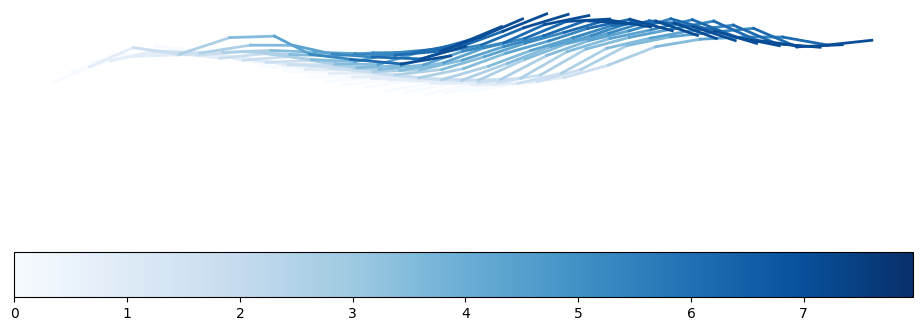

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl

# ------------------------
# 1) USER CONFIG
# ------------------------
file_path = '/Users/jamesxu/Desktop/Crab Lab/surface swimmer/diffLength_data/40cm_new-James-2024-10-01/videos/40cm_run4DLC_resnet50_40cm_newOct1shuffle1_100000.csv'
fps = 30

# Crop data from 2s to 10s
start_time_s = 2.0
end_time_s   = 10.0

# Real-world conversion
real_width_m  = 0.645
real_height_m = 1.4
frame_width_pixels  = 886
frame_height_pixels = 1920

# We'll assume bodyparts are named 'bodypart1' through 'bodypart21'
NUM_BODYPARTS = 21

# We want to sample only ~10 frames in the cropped region
desired_num_points = 10

# ------------------------
# 2) LOAD DLC CSV
# ------------------------
data = pd.read_csv(file_path, header=[1, 2])

# Determine frame indices for crop
start_frame = int(start_time_s * fps)
end_frame   = int(end_time_s   * fps)
num_frames_cropped = end_frame - start_frame  # e.g., (10 - 2)*30 = 240

# Build time array for the cropped region => 0..(end_time_s - start_time_s)
time_cropped = np.arange(num_frames_cropped) / fps  # shape: (num_frames_cropped,)
t_min = time_cropped[0]  # ~0
t_max = time_cropped[-1] # ~8

# Set up a color normalization (from 0..8 s)
norm = mpl.colors.Normalize(vmin=t_min, vmax=t_max)
cmap = cm.get_cmap("Blues")  # pick your colormap

# We'll pick exactly 10 indices from 0..(num_frames_cropped - 1)
# so we draw 9 line segments per body part.
indices = np.linspace(0, num_frames_cropped - 1, desired_num_points).astype(int)

# ------------------------
# 3) MAKE FIGURE BIGGER
# ------------------------
plt.figure(figsize=(10, 8))  # Larger figure

# ------------------------
# 4) LOOP OVER BODYPARTS
# ------------------------
for i in range(1, NUM_BODYPARTS + 1):
    bp_name = f'bodypart{i}'
    
    # Extract x, y for the entire video
    x_pixels = data[(bp_name, 'x')].values
    y_pixels = data[(bp_name, 'y')].values
    
    # Crop
    x_crop = x_pixels[start_frame:end_frame]
    y_crop = y_pixels[start_frame:end_frame]
    
    # Convert to meters
    scale_x = real_width_m / frame_width_pixels
    scale_y = real_height_m / frame_height_pixels
    x_m = x_crop * scale_x
    y_m = y_crop * scale_y
    
    # ------------------------
    # 5) ROTATE 90° CLOCKWISE
    # ------------------------
    # Standard 2D rotation (around the origin):
  
    x_rot =  y_m
    y_rot = -x_m
    
    # ------------------------
    # 6) DOWNSAMPLE & PLOT
    # ------------------------
    # We'll join successive points in 'indices'
    for k in range(len(indices) - 1):
        idx0 = indices[k]
        idx1 = indices[k+1]
        
        # Determine color based on time at idx0
        # (You could average idx0 & idx1 if you prefer)
        t_now = time_cropped[idx0]  # in seconds, range ~0..8
        frac  = norm(t_now)         # => fraction in 0..1
        color = cmap(frac)
        
        plt.plot(
            [x_rot[idx0], x_rot[idx1]],
            [y_rot[idx0], y_rot[idx1]],
            color=color,
            linewidth=2
        )

# Invert if original coordinates have Y downwards
# Here we've rotated, so you can decide if you still want to invert.
# For now, let's leave it as-is. If needed, uncomment:
# plt.gca().invert_yaxis()

plt.xlabel("X_rot (m)")
plt.ylabel("Y_rot (m)")
# plt.title("Bodyparts 1–21, 2–10 s, 90° CCW Rotation, 10-frame Downsample")

# Set aspect ratio to equal
plt.gca().set_aspect('equal', adjustable='box')

# Add colorbar for 0..8 s
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # dummy data for colorbar
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='horizontal', pad=0.2)
# cbar.set_label('Time in Cropped Window (s)')

plt.tight_layout()
fig.patch.set_visible(False)
plt.axis('off')
plt.show()
